## Healthcare Data Analysis

### By: Naveen B

### Problem Statement
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset

In [2]:
data=pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### EDA

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

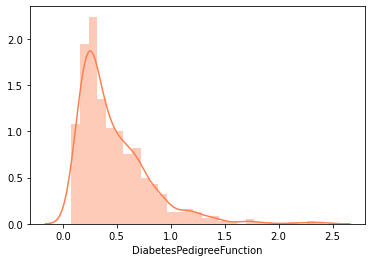

In [8]:
sns.distplot(data.DiabetesPedigreeFunction,color="coral")

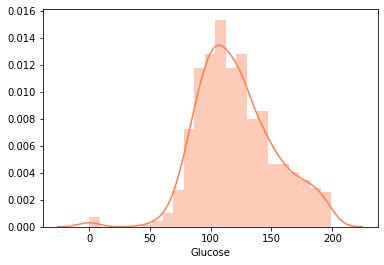

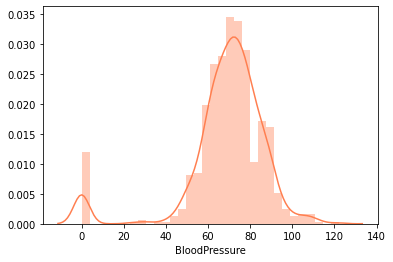

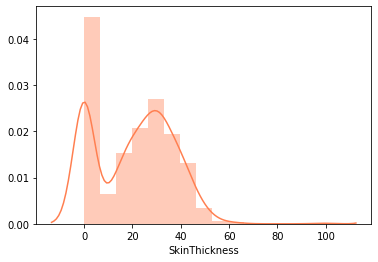

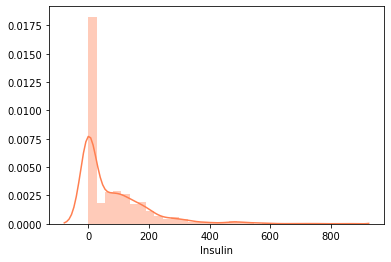

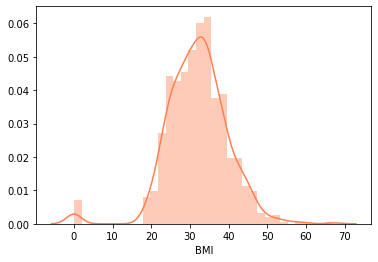

In [66]:
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for i,col in enumerate(cols):
    plt.figure(i)
    sns.distplot(data[col],color="coral")

In [68]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'] :
    data[col]=data[col].replace(0,np.nan)

# Replacing 0's with nan as zero doesn't makes sense for these columns.

In [70]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


### Missing value imputation

In [14]:
# Replacing the Null value in Glucose with the mean value
# Replacing the Null value in Blood pressure with the mean value
# Replacing the Null value in SkinThickness with the mean value
# Replacing the Null value in Insulin with the median value
# Replacing the Null value in BMI with the mean value

In [15]:
data.Glucose.fillna(data.Glucose.mean(),inplace=True) #Replacw with mean value
data.BloodPressure.fillna(data.BloodPressure.mean(),inplace=True) #Replacw with mean value
data.SkinThickness.fillna(data.SkinThickness.mean(),inplace=True) #Replacw with mean value
data.Insulin.fillna(data.Insulin.median(),inplace=True) #Replacw with median value
data.BMI.fillna(data.BMI.mean(),inplace=True) #Replacw with mean value

### Data types

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

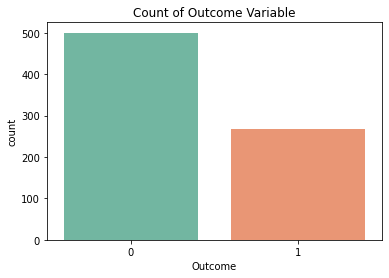

In [10]:
sns.countplot(data.Outcome,palette="Set2")
plt.title("Count of Outcome Variable")
plt.show()

In [11]:
# Dataset have unbalanced Outcome

In [14]:
data_cleaned=data
data_cleaned.to_csv("healthcarecleaned.csv")

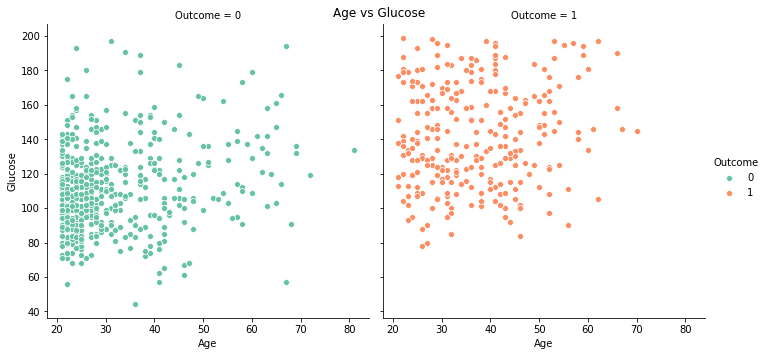

In [91]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(sns.scatterplot,"Age","Glucose").add_legend()
plt.suptitle("Age vs Glucose")
plt.show()

- For diabetes patient Gluocose level is above 80

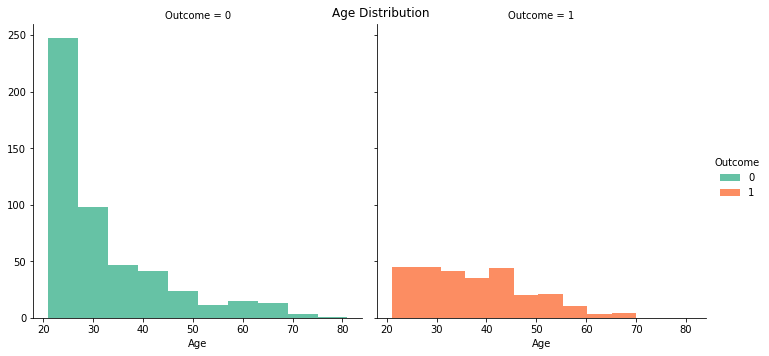

In [90]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(plt.hist,"Age").add_legend()
plt.suptitle("Age Distribution")
plt.show()

- Diabetic patient are more from age interval of 25-45 years

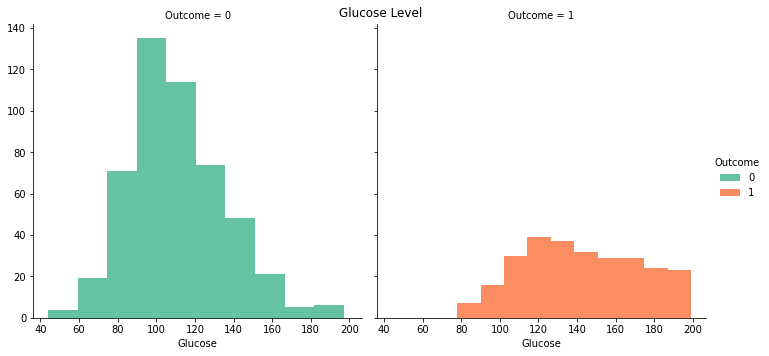

In [89]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(plt.hist,"Glucose").add_legend()
plt.suptitle("Glucose Level")
plt.show()

- Diabetic patient are more from Glucose level from 110-170 years

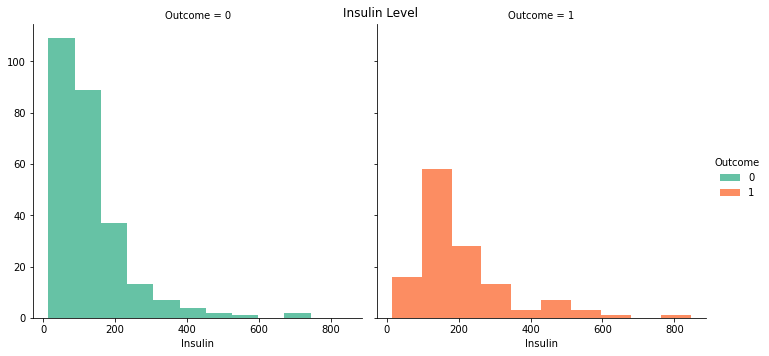

In [88]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(plt.hist,"Insulin").add_legend()
plt.suptitle("Insulin Level")
plt.show()

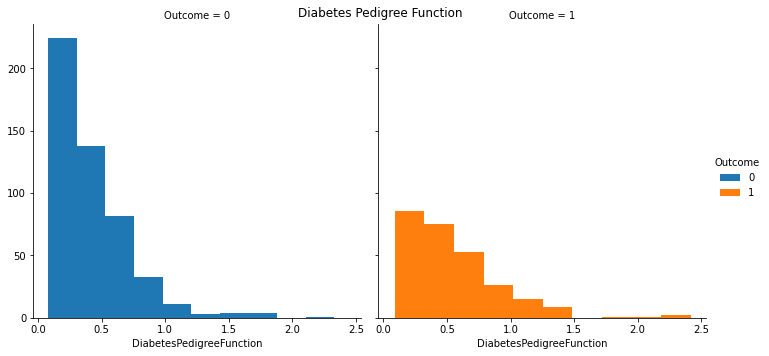

In [92]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(plt.hist,"DiabetesPedigreeFunction").add_legend();
plt.suptitle("Diabetes Pedigree Function")
plt.show()

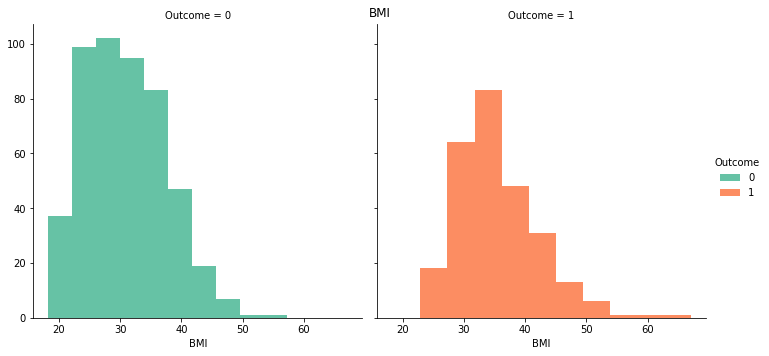

In [93]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(plt.hist,"BMI").add_legend()
plt.suptitle("BMI")
plt.show()

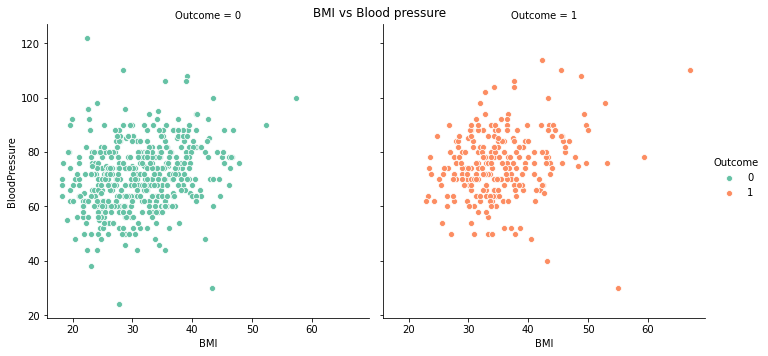

In [94]:
sns.FacetGrid(data,col="Outcome",hue="Outcome",height=5,palette="Set2").map(sns.scatterplot,"BMI","BloodPressure").add_legend()
plt.suptitle("BMI vs Blood pressure")
plt.show()

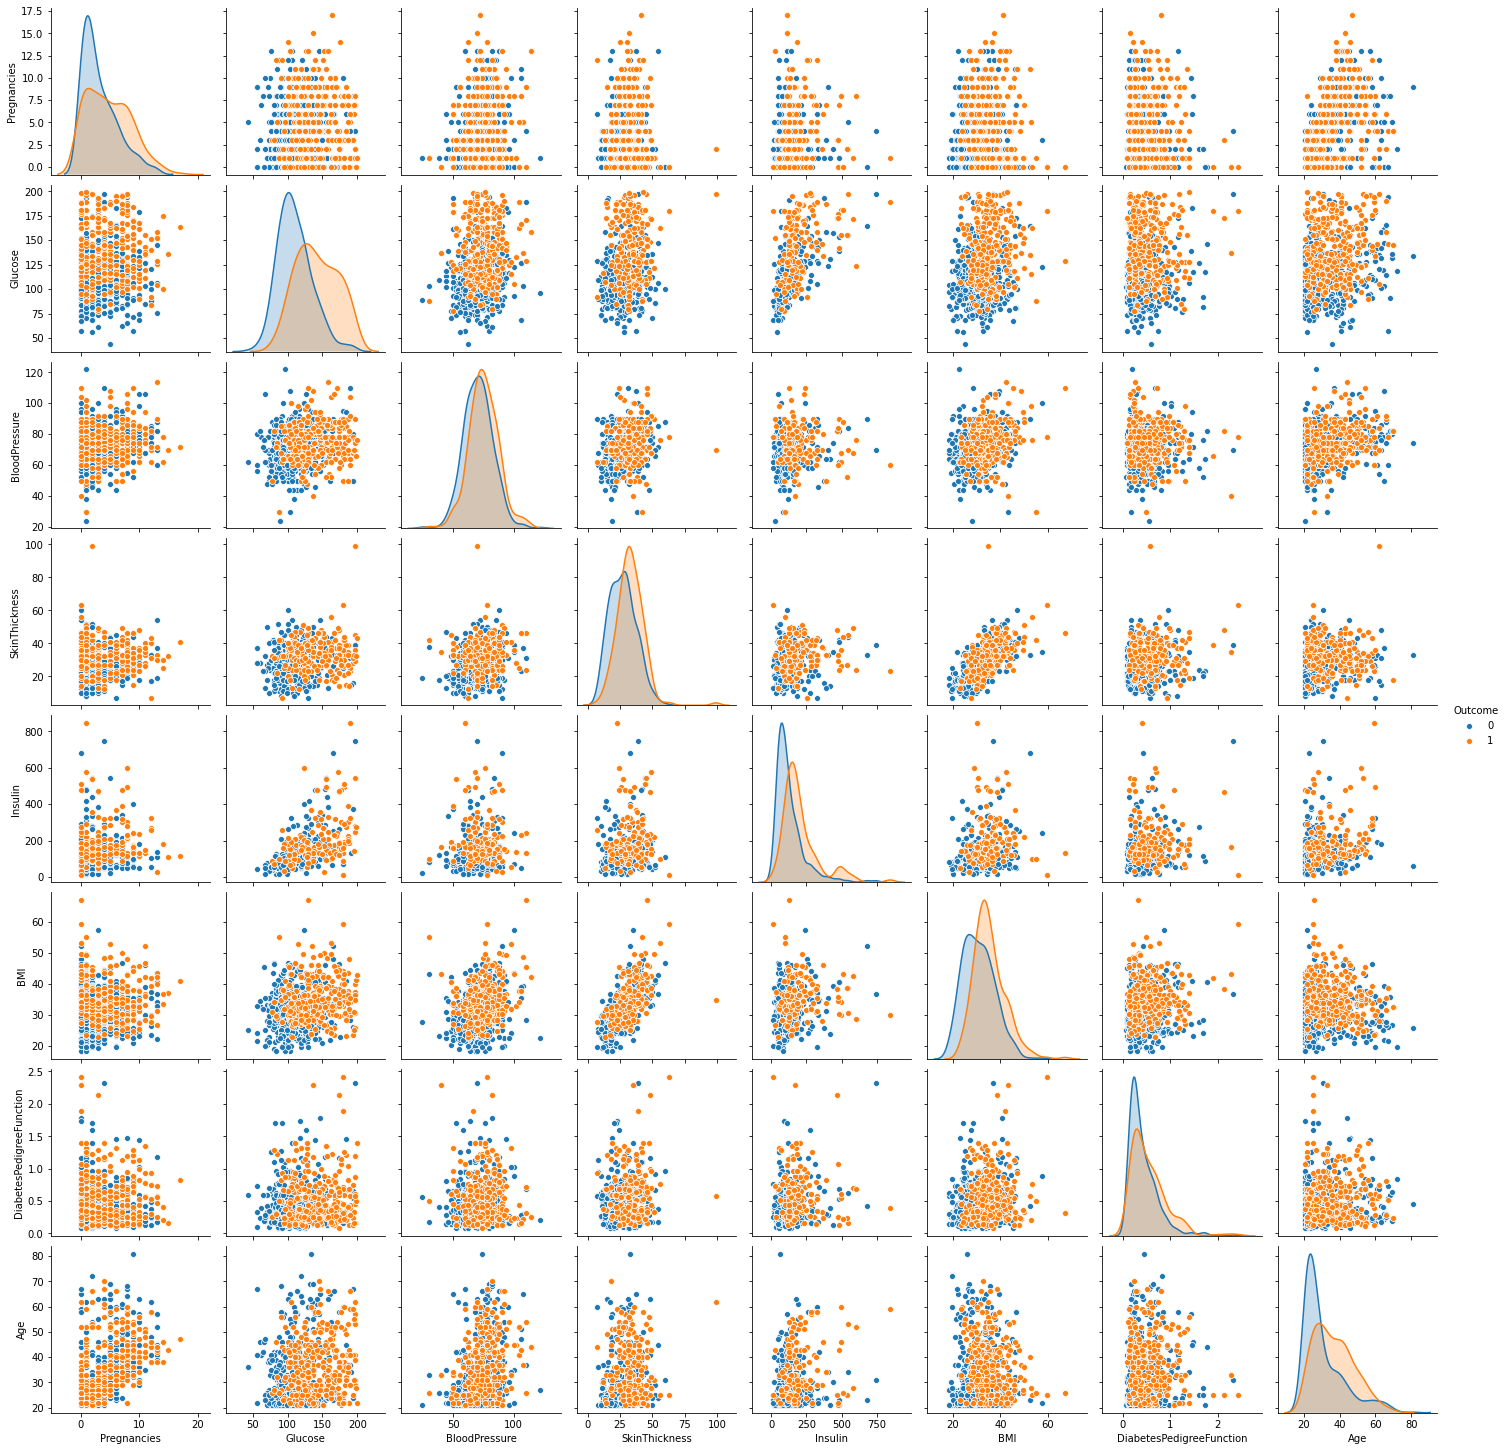

In [97]:
sns.pairplot(data,hue="Outcome")
plt.show()

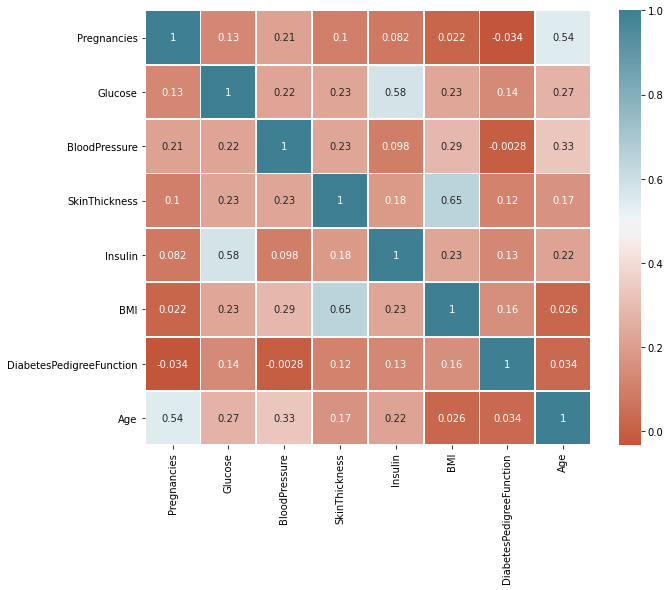

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap((data.iloc[:,:-1]).corr(),annot=True,linewidths=1,cmap=sns.diverging_palette(20, 220, n=256),ax=ax);

In [34]:
# BMI and SkinThickness are correlated
# Insulin and Glucose are correlated
# Age and Pregnancy are correlated

#### Splitting Dataset into Training and Testing set

In [35]:
X = data.iloc[:,:-1].values #Features
y = data.iloc[:,-1].values  #Labels

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=121) #Training data and Validation data

### Feature Scaling

In [36]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train) #Train data Standardization
X_test=sc.transform(X_test) #Test data Standardization

### Model Development

#### Logistic Regression

In [37]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print("Training Score for Logisitic Regression :{}\nTesting Score  for Logisitic Regression :{}".format(lg.score(X_train,y_train),lg.score(X_test,y_test)))

Training Score for Logisitic Regression :0.7671009771986971
Testing Score  for Logisitic Regression :0.8181818181818182


In [39]:
scores=pd.DataFrame([["Logsitic Regression",lg.score(X_train,y_train),lg.score(X_test,y_test)]]
             ,columns=["Model","Training Score","Testing Score"],
             )

scores

,Model,Training Score,Testing Score
0,Logsitic Regression,0.767101,0.818182


#### Random Forest Classifier

In [40]:
rf=RandomForestClassifier(min_samples_split= 4, max_leaf_nodes = 15,max_features="sqrt", max_depth=15.0,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15.0, max_features='sqrt',
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [41]:
print("Training Score for Random Forest Classifier:{}\nTesting Score for Random Forest Classifier:{}".format(rf.score(X_train,y_train),rf.score(X_test,y_test)))

Training Score for Random Forest Classifier:0.8289902280130294
Testing Score for Random Forest Classifier:0.8376623376623377


In [42]:
scores=scores.append(pd.DataFrame([["Random Forest Classifier",rf.score(X_train,y_train),rf.score(X_test,y_test)]]
             ,columns=["Model","Training Score","Testing Score"]
             ) ,ignore_index=True)
scores

,Model,Training Score,Testing Score
0,Logsitic Regression,0.767101,0.818182
1,Random Forest Classifier,0.828990,0.837662


#### KNN Classifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [44]:
print("Training Score for KNN Classifier:{}\nTesting Score for KNN Classifier:{}".format(knn.score(X_train,y_train),knn.score(X_test,y_test)))

Training Score for KNN Classifier:0.7801302931596091
Testing Score for KNN Classifier:0.8311688311688312


In [45]:
scores=scores.append(pd.DataFrame([["KNN Classifier",
                                    knn.score(X_train,y_train),
                                    knn.score(X_test,y_test)]],
                                    columns=["Model","Training Score","Testing Score"]
                                 ) ,ignore_index=True)

scores

,Model,Training Score,Testing Score
0,Logsitic Regression,0.767101,0.818182
1,Random Forest Classifier,0.828990,0.837662
2,KNN Classifier,0.780130,0.831169


#### SVM Classifier

In [46]:
svm=SVC(C=.7,kernel="rbf")
svm.fit(X_train,y_train)

SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
print("Training Score for SVM Classifier:{}\nTesting Score for SVM Classifier:{}".format(svm.score(X_train,y_train),svm.score(X_test,y_test)))

Training Score for SVM Classifier:0.8094462540716613
Testing Score for SVM Classifier:0.8181818181818182


In [48]:
scores=scores.append(pd.DataFrame([["SVM Classifier",svm.score(X_train,y_train),svm.score(X_test,y_test)]]
             ,columns=["Model","Training Score","Testing Score"] 
                                ) ,ignore_index=True)

scores

,Model,Training Score,Testing Score
0,Logsitic Regression,0.767101,0.818182
1,Random Forest Classifier,0.828990,0.837662
2,KNN Classifier,0.780130,0.831169
3,SVM Classifier,0.809446,0.818182


In [49]:
scores.style.highlight_max(color="lightgreen",subset=["Testing Score"])

,Model,Training Score,Testing Score
0,Logsitic Regression,0.767101,0.818182
1,Random Forest Classifier,0.828990,0.837662
2,KNN Classifier,0.780130,0.831169
3,SVM Classifier,0.809446,0.818182


##### Random Forest Classifier has high testing accuracy score

### Model Evaluation

##### Logistic Regression

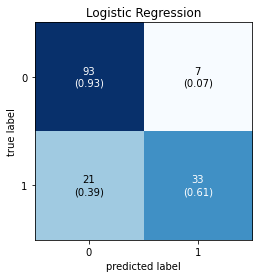

In [50]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,lg.predict(X_test)),show_normed=True)
plt.title("Logistic Regression")
plt.show()

In [51]:
print(classification_report(y_test,lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.82      0.61      0.70        54

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154



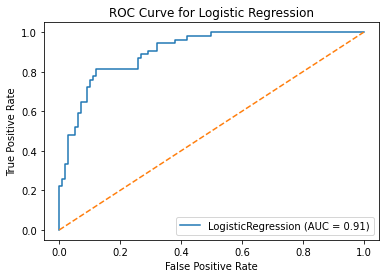

In [52]:
plot_roc_curve(lg,X_test,y_test);
plt.plot([0,1],[0,1],linestyle='--'); 
plt.title("ROC Curve for Logistic Regression")
plt.show()

##### Misclassification of 1  is more i.e. False Negative is 39%  with   AUC of 0.91 

##### Random Forest

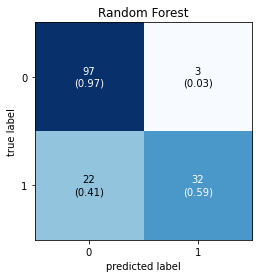

In [53]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rf.predict(X_test)),show_normed=True)
plt.title("Random Forest")
plt.show()

In [54]:
print(classification_report(y_test,lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.82      0.61      0.70        54

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154



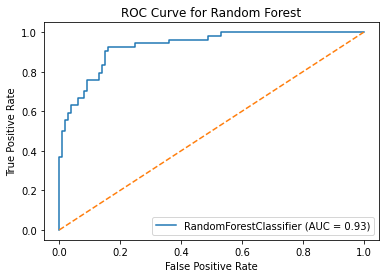

In [55]:
plot_roc_curve(rf,X_test,y_test);
plt.plot([0,1],[0,1],linestyle='--'); 
plt.title("ROC Curve for Random Forest")
plt.show()

##### Misclassification of 1  is more i.e. False Negative is 41% with  AUC of 0.93

##### SVM Classifier

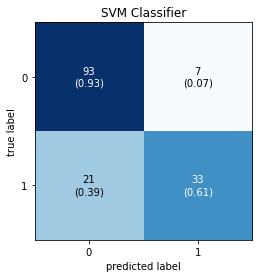

In [56]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,svm.predict(X_test)),show_normed=True)
plt.title("SVM Classifier")
plt.show()

In [57]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.82      0.61      0.70        54

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154



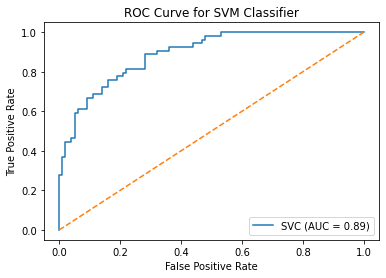

In [58]:
plot_roc_curve(svm,X_test,y_test);
plt.plot([0,1],[0,1],linestyle='--'); 
plt.title("ROC Curve for SVM Classifier")
plt.show()

##### Misclassification of 1  is more i.e. False Negative is 39% with  AUC of 0.89

##### KNN Classifier

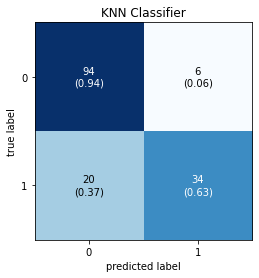

In [59]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,knn.predict(X_test)),show_normed=True)
plt.title("KNN Classifier")
plt.show()

In [60]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       100
           1       0.85      0.63      0.72        54

    accuracy                           0.83       154
   macro avg       0.84      0.78      0.80       154
weighted avg       0.83      0.83      0.82       154



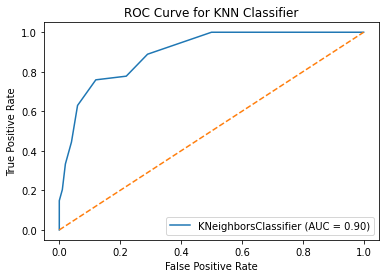

In [61]:
plot_roc_curve(knn,X_test,y_test);
plt.plot([0,1],[0,1],linestyle='--'); 
plt.title("ROC Curve for KNN Classifier")
plt.show()

##### KNN has high Sensitivity and Specificity compared to othe models with  AUC of 0.90